## Observations and Insights 

In [279]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'outer')

# Display the data table for preview
mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [280]:
# Checking the number of mice.
print('Number of Mice: ' + str(len(mouse_study_merge['Mouse ID'].unique())))

Number of Mice: 249


In [281]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_merge = mouse_study_merge.sort_values(['Mouse ID', 'Timepoint'])
duplicate_mouse = mouse_study_merge[mouse_study_merge.duplicated(['Mouse ID','Timepoint'])]
duplicate_mouse_id = duplicate_mouse['Mouse ID'].unique()
print('Duplicate mouse id is: ' + str(duplicate_mouse_id[0]))

Duplicate mouse id is: g989


In [282]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_duplicate = mouse_study_merge.loc[mouse_study_merge['Mouse ID'] == duplicate_mouse_id[0]]
mouse_study_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [283]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_merge.loc[mouse_study_merge['Mouse ID'] != duplicate_mouse_id[0]]
mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
898,a203,0,45.000000,0,Infubinol,Female,20,23
899,a203,5,48.508468,0,Infubinol,Female,20,23
900,a203,10,51.852437,1,Infubinol,Female,20,23
901,a203,15,52.777870,1,Infubinol,Female,20,23
902,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
105,z969,25,63.145652,2,Naftisol,Male,9,30
106,z969,30,65.841013,3,Naftisol,Male,9,30
107,z969,35,69.176246,4,Naftisol,Male,9,30
108,z969,40,70.314904,4,Naftisol,Male,9,30


In [284]:
# Checking the number of mice in the clean DataFrame.
print('Number of mice after dropping duplicate : ' + str(len(mouse_study_clean['Mouse ID'].unique())))

Number of mice after dropping duplicate : 248


## Summary Statistics

In [285]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_study_groupby = mouse_study_clean.groupby('Drug Regimen')
mean_tumour = mouse_study_groupby['Tumor Volume (mm3)'].mean()

median_tumour = mouse_study_groupby['Tumor Volume (mm3)'].median()
median_tumour

var_tumour = mouse_study_groupby['Tumor Volume (mm3)'].var()
var_tumour

std_tumour = mouse_study_groupby['Tumor Volume (mm3)'].std()
std_tumour

sem_tumour = mouse_study_groupby['Tumor Volume (mm3)'].sem()
sem_tumour

summary_dataframe = pd.DataFrame({'Mean Tumour Volume (mm3)': mean_tumour,
                                'Median Tumour Volume (mm3)': median_tumour,
                                'Variance of Tumour Volume (mm3)': var_tumour,
                                'Standard Deviation of Tumour Volume (mm3)': std_tumour,
                                'SEM of Tumour Volume (mm3)': sem_tumour})
summary_dataframe

,Mean Tumour Volume (mm3),Median Tumour Volume (mm3),Variance of Tumour Volume (mm3),Standard Deviation of Tumour Volume (mm3),SEM of Tumour Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [286]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate_dataframe = mouse_study_groupby['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregate_dataframe

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

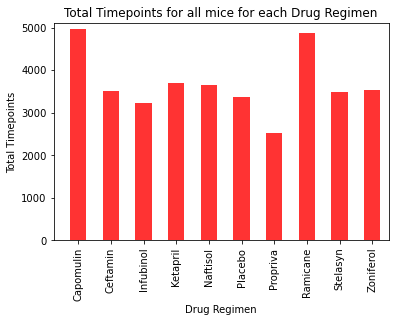

In [287]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_timepoints = mouse_study_groupby['Timepoint'].sum()
bar_plot = mouse_timepoints.plot(kind = 'bar', color = 'red', align = 'center', alpha = 0.8, width = 0.5, title = 'Total Timepoints for all mice for each Drug Regimen')
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Total Timepoints')
bar_plot.set_xlim(-0.75, len(mouse_timepoints)-0.5)
bar_plot.set_ylim(0, mouse_timepoints.max()+150);

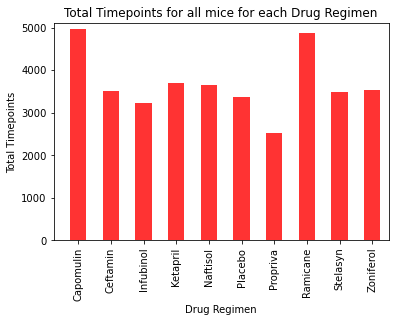

In [288]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = mouse_timepoints.keys()
plt.bar(drug_regimen, mouse_timepoints, color = 'red', align = 'center', alpha = 0.8, width = 0.5)
plt.title('Total Timepoints for all mice for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.xlim(-0.75, len(mouse_timepoints)-0.5)
plt.ylim(0, mouse_timepoints.max()+150)
plt.xticks(rotation='vertical')
plt.show();

Text(0, 0.5, 'Mouse Gender')

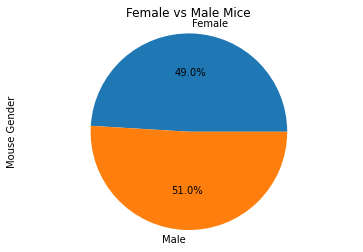

In [300]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = mouse_study_clean.groupby('Sex')['Sex'].count()
mouse_gender.plot(kind = 'pie', y = mouse_gender, autopct = '%1.1f%%', title = 'Female vs Male Mice')
plt.axis('equal')
plt.ylabel("Mouse Gender")

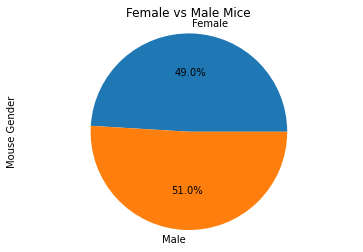

In [290]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = mouse_study_clean.groupby('Sex')
df = label['Sex'].count()
sex = df.keys()
plt.pie(df, labels = sex, autopct = '%1.1f%%')
plt.title('Female vs Male Mice')
plt.axis('equal')
plt.ylabel('Mouse Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [291]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_time_df = mouse_study_clean.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_greatest_time_merge = pd.merge(greatest_time_df, mouse_study_clean, on =('Mouse ID', 'Timepoint'), how = 'left')
mouse_greatest_time_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [333]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

capomulin_tumor_volume =[]
ramicane_tumor_volume =[]
infubinol_tumor_volume =[]
ceftamin_tumor_volume =[]

# Locate the rows which contain mice on each drug and get the tumor volumes

capomulin_tumor_volume = mouse_greatest_time_merge.loc[mouse_greatest_time_merge['Drug Regimen'] == treatment[0]]['Tumor Volume (mm3)']
ramicane_tumor_volume = mouse_greatest_time_merge.loc[mouse_greatest_time_merge['Drug Regimen'] == treatment[1]]['Tumor Volume (mm3)']
infubinol_tumor_volume = mouse_greatest_time_merge.loc[mouse_greatest_time_merge['Drug Regimen'] == treatment[2]]['Tumor Volume (mm3)']
ceftamin_tumor_volume = mouse_greatest_time_merge.loc[mouse_greatest_time_merge['Drug Regimen'] == treatment[3]]['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Determine outliers using upper and lower bounds

# Outliers for drug Capomulin

quartiles_capomulin = capomulin_tumor_volume.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

bool_capomulin = False
for cap in capomulin_tumor_volume:
    if (cap < lower_bound_capomulin) or (cap > upper_bound_capomulin):
        print('Outlier for drug capomulin: ' + str(round(cap),2))
        print('\n', end='')
        bool_capomulin = True
        
if bool_capomulin == False:
    print('No potential outliers for drug capomulin')
    print('\n', end='')

# Outliers for drug Ramicane
quartiles_ramicane = ramicane_tumor_volume.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

bool_ramicane = False
for ram in ramicane_tumor_volume:
    if (ram < lower_bound_ramicane) or (ram > upper_bound_ramicane):
        print('Outlier for drug ramicane : ' + str(round(ram),2))
        print('\n', end='')
        bool_ramicane = True
        
if bool_ramicane == False:
    print('No potential outliers for drug ramicane')
    print('\n', end='')
    
# Outliers for drug Infubinol

quartiles_infubinol = infubinol_tumor_volume.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

bool_infubinol = False
for inf in infubinol_tumor_volume:
    if (inf < lower_bound_infubinol) or (inf > upper_bound_infubinol):
        print('Outlier for drug infubinol: ' + str(round(inf,2)))
        print('\n', end='')
        bool_infubinol = True
        
if bool_infubinol == False:
    print('No potential outliers for drug infubinol')
    print('\n', end='')

# Outliers for drug Ceftamin
quartiles_ceftamin = ceftamin_tumor_volume.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

bool_ceftamin = False
for cef in ceftamin_tumor_volume:
    if (cef < lower_bound_ceftamin) or (cef > upper_bound_ceftamin):
        print('Outlier for drug ceftamin: ' + str(round(cef),2))
        print('\n', end='')
        bool_ceftamin = True
        
if bool_ceftamin == False:
    print('No potential outliers for drug ceftamin')
    print('\n', end='')

quantitative_summary = pd.DataFrame({'Drug': ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],
                                    'Lower Quartile': [lowerq_capomulin, lowerq_ramicane, lowerq_infubinol, lowerq_ceftamin],
                                    'Upper Quartiles':[upperq_capomulin, upperq_ramicane, upperq_infubinol, upperq_ceftamin],
                                    'IQR':[iqr_capomulin,iqr_ramicane,iqr_infubinol,iqr_ceftamin],
                                    'Outlier lower boundaries':[lower_bound_capomulin,lower_bound_ramicane,lower_bound_infubinol,lower_bound_ceftamin],
                                    'Outlier upper boundaries': [upper_bound_capomulin,upper_bound_ramicane,upper_bound_infubinol,upper_bound_ceftamin],
                                    'Potential outliers': [iqr_capomulin,iqr_ramicane,iqr_infubinol,iqr_ceftamin]})
quantitative_summary

No potential outliers for drug capomulin

No potential outliers for drug ramicane

Outlier for drug infubinol: 36.32

No potential outliers for drug ceftamin



,Drug,Lower Quartile,Upper Quartiles,IQR,Outlier lower boundaries,Outlier upper boundaries,Potential outliers
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,7.781863
1,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811,9.098537
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,11.477135
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,15.577752


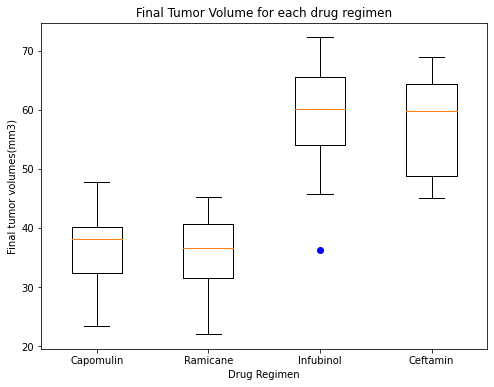

In [315]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Final Tumor Volume for each drug regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final tumor volumes(mm3)')
ax1.boxplot([capomulin_tumor_volume, ramicane_tumor_volume, infubinol_tumor_volume, ceftamin_tumor_volume], sym ='bo')
ax1.set_xticklabels(treatment)
plt.show();

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs Time point for mouse w914')

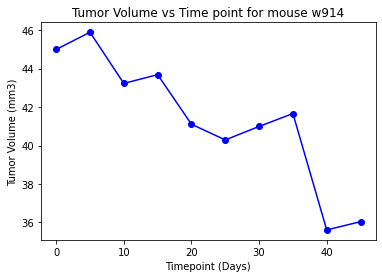

In [295]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseid = 'w914'
capomulin_df = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == treatment[0]]
capomulin_specific_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouseid, ['Timepoint', 'Tumor Volume (mm3)']]
plt.plot(capomulin_specific_df['Timepoint'], capomulin_specific_df['Tumor Volume (mm3)'], marker = 'o', color = 'b')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Time point for mouse ' + mouseid)

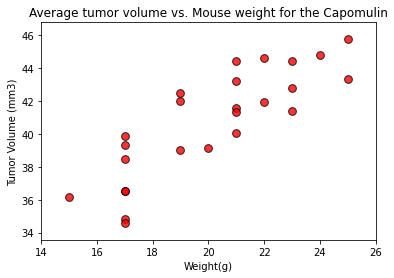

In [297]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter_df = capomulin_df.groupby('Mouse ID')
average_tumor = capomulin_scatter_df['Tumor Volume (mm3)'].mean()
weight = capomulin_scatter_df['Weight (g)'].max()
plt.scatter(weight, average_tumor, marker = 'o', facecolor = 'red', edgecolor = 'black', s = 60, alpha = 0.8)
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average tumor volume vs. Mouse weight for the Capomulin')
plt.xlim(weight.min()-1, weight.max()+1)
plt.ylim(average_tumor.min()-1, average_tumor.max()+1)
plt.show();

## Correlation and Regression

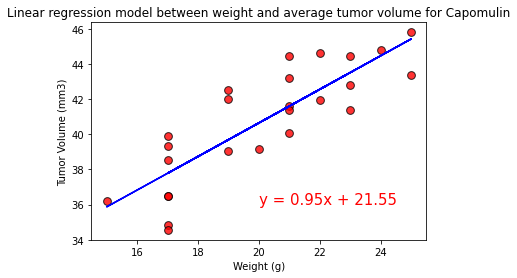

The correlation coeffiecient is: 0.8419363424694718
The r-squared is: 0.7088568047708717


In [311]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_value = weight
y_value = average_tumor
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)

regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value, marker = 'o', facecolor = 'red', edgecolor = 'black', s = 60, alpha = 0.8)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Linear regression model between weight and average tumor volume for Capomulin")
plt.plot(x_value,regress_values,"b-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show();
print("The correlation coeffiecient is: "+ str(rvalue))
print(f"The r-squared is: {rvalue**2}")